In [1]:
key = '79a6a1db946c48b58b3174564c454791'

In [2]:
import shutil

from fastai.vision.widgets import *
from fastbook import *

In [3]:
men_types = 'beautiful','normal','ugly'

In [4]:
path = Path('men')

In [5]:
shutil.rmtree('men')

In [6]:
if not path.exists():
    path.mkdir()
    for o in men_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key,f'{o} men')
        download_images(dest,urls=results.attrgot('content_url'))
        #delete bad images
        print(o)
        fns = get_image_files(Path(path/o))
        failed = verify_images(fns)
        print(failed)
        failed.map(Path.unlink)

beautiful


(#1) [Path('men/beautiful/00000064.png')]


normal


(#3) [Path('men/normal/00000004.jpg'),Path('men/normal/00000112.jpg'),Path('men/normal/00000099.jpg')]



 Download of https://dubay319.files.wordpress.com/2013/11/ugly-men-123-jpg.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p men/ugly
$ cd men/ugly
$ wget -c https://dubay319.files.wordpress.com/2013/11/ugly-men-123-jpg.jpg
$ tar xf ugly-men-123-jpg.jpg
 And re-run your code once the download is successful


 Download of https://writingsofashortfatuglyman.files.wordpress.com/2015/09/untitled-2.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p men/ugly
$ cd men/ugly
$ wget -c https://writingsofashortfatuglyman.files.wordpress.com/2015/09/untitled-2.jpg
$ tar xf untitled-2.jpg
 And re-run your code once the download is successful

ugly


(#5) [Path('men/ugly/00000041.jpg'),Path('men/ugly/00000000.jpg'),Path('men/ugly/00000056.jpg'),Path('men/ugly/00000098.jpg'),Path('men/ugly/00000108.jpg')]


In [7]:
men = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
men = men.new(item_tfms = RandomResizedCrop(224,min_scale=0.5), batch_tfms = aug_transforms())

In [9]:
dls= men.dataloaders(path)

In [10]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)

In [11]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.686906,1.214908,0.436782,00:04


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.996944,0.924436,0.333333,00:04
1,0.846346,0.757939,0.287356,00:04
2,0.721573,0.702732,0.218391,00:04
3,0.603893,0.671679,0.218391,00:04
4,0.537398,0.681920,0.218391,00:04


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


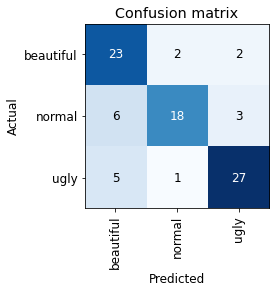

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

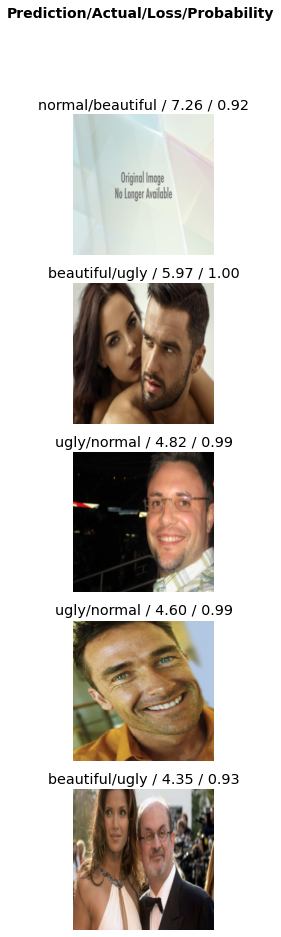

In [13]:
interp.plot_top_losses(5, nrows=5)


In [14]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [16]:
learn.export()

In [17]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')

In [20]:
learn_inf.predict('men/yaniv.jpg')

('normal', tensor(1), tensor([0.0165, 0.8743, 0.1092]))

In [63]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [64]:
img = PILImage.create(btn_upload.data[-1])

In [65]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [66]:
pred,pred_idx,probs = learn_inf.predict(img)

In [67]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: normal; Probability: 0.9238')

In [68]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

32432


In [69]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    #out_pl = widgets.Output()
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    out_pl
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    print(32432)

btn_run.on_click(on_click_classify)

In [70]:
with out_pl: display(img.to_thumb(128,128))
out_pl

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<PIL.Image.Image image mode=RGB size=1…

In [71]:
btn_upload = widgets.FileUpload()

In [72]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

32432


In [52]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [53]:
btn_upload = SimpleNamespace(data = ['men/bradd.jpg'])

In [55]:
img = PILImage.create(btn_upload.data[-1])

In [56]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [57]:
pred,pred_idx,probs = learn_inf.predict(img)


In [58]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: beautiful; Probability: 0.5762')

In [59]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [60]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [61]:
btn_upload = widgets.FileUpload()

In [62]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])